<h1>Training a Parts of speech tagger using NLTK tree bank data set </h1>

In [2]:
import nltk
nltk.download('treebank')

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\cmos\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\treebank.zip.


True

In [3]:
import nltk
import numpy as np
from nltk import word_tokenize
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [7]:
# Define a Function to Extract Features from a Sentence
def sentence_features(st, ix):
    d_ft = {}
    d_ft['word'] = st[ix]
    d_ft['dist_from_first'] = ix - 0
    d_ft['dist_from_last'] = len(st) - ix
    d_ft['capitalized'] = st[ix][0].upper() == st[ix][0]
    d_ft['prefix1'] = st[ix][0]
    d_ft['prefix2'] = st[ix][:2]
    d_ft['prefix3'] = st[ix][:3]
    d_ft['suffix1'] = st[ix][-1]
    d_ft['suffix2'] = st[ix][-2:]
    d_ft['suffix3'] = st[ix][-3:]
    d_ft['prev_word'] = '' if ix==0 else st[ix-1]
    d_ft['next_word'] = '' if ix==(len(st)-1) else st[ix+1]
    d_ft['numeric'] = st[ix].isdigit()
    return d_ft

In [9]:
# Extract Untagged Sentences from Tagged Sentences
def get_untagged_sentence(tagged_sentence):
    [s,t] = zip(*tagged_sentence)
    return list(s)

In [10]:
# Load Tagged Sentences from the NLTK Treebank Dataset
tagged_sentences = nltk.corpus.treebank.tagged_sents(tagset='universal')

In [11]:
# Extract Features and Tags from Tagged Sentences
def ext_ft(tg_sent):
    sent, tag = [], []
 
    for tg in tg_sent:
        for index in range(len(tg)):
            sent.append(sentence_features(get_untagged_sentence(tg), index))
            tag.append(tg[index][1])
 
    return sent, tag

In [12]:
#Extract Features and Tags for All Sentences
X,y = ext_ft(tagged_sentences)

In [14]:
# Prepare Data for Training
n_sample = 5000
dict_vectorizer = DictVectorizer(sparse=False)
X_transformed = dict_vectorizer.fit_transform(X[0:n_sample])
y_sampled = y[0:n_sample]

In [15]:
# splits the data into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X_transformed, y_sampled, test_size=0.2, random_state=123)

In [16]:
# Train a Random Forest Classifier
rf = RandomForestClassifier(n_jobs=4)
rf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=4)

In [17]:
# Predict POS Tags for a Sentence
def predict_pos_tags(sentence):
    tagged_sentence = []
    features = [sentence_features(sentence, index) for index in range(len(sentence))]
    features = dict_vectorizer.transform(features)
    tags = rf.predict(features)
    return zip(sentence, tags)

In [18]:
#Test the POS Tagger
test_sentence = "This is a simple POS tagger"
for tagged in predict_pos_tags(test_sentence.split()):
    print(tagged)

('This', 'DET')
('is', 'VERB')
('a', 'DET')
('simple', 'ADJ')
('POS', 'NOUN')
('tagger', 'NOUN')


In [19]:
#Evaluate the Model
predictions = rf.predict(X_test)

In [20]:
accuracy_score(y_test,predictions)

0.915

In [21]:
conf_matrix = confusion_matrix(y_test,predictions)

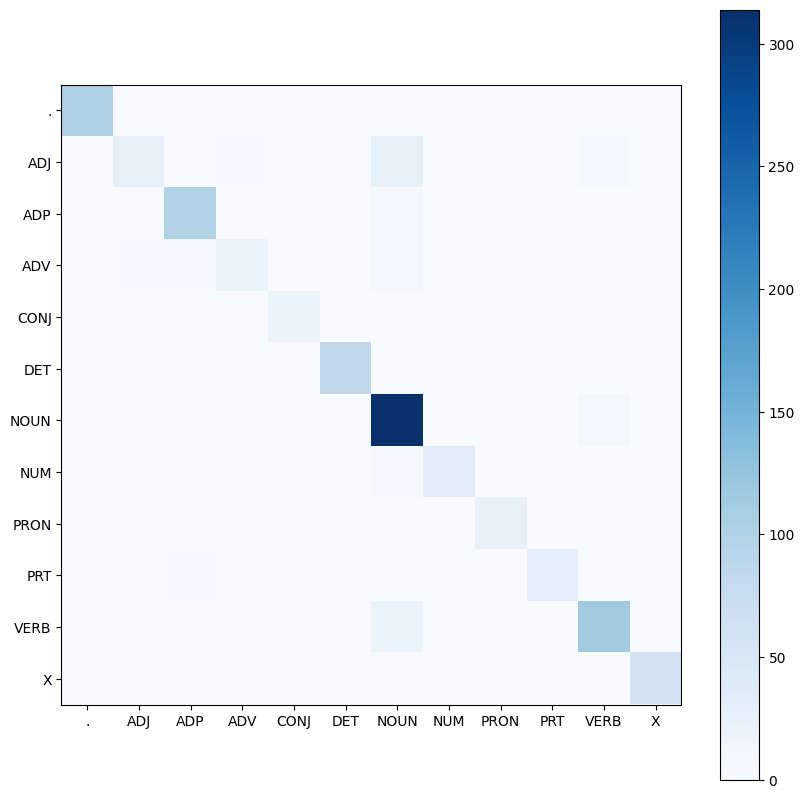

In [22]:
plt.figure(figsize=(10,10))
plt.xticks(np.arange(len(rf.classes_)),rf.classes_)
plt.yticks(np.arange(len(rf.classes_)),rf.classes_)
plt.imshow(conf_matrix,cmap=plt.cm.Blues)
plt.colorbar()

In [24]:
#Analyze Feature Importance
feature_list = zip(dict_vectorizer.get_feature_names_out(),rf.feature_importances_)
sorted_features = sorted(feature_list,key=lambda x: x[1], reverse=True)
print(sorted_features[0:20])

[('dist_from_last', 0.017345393849357117), ('prefix1=*', 0.015566746108228342), ('capitalized', 0.01292762454931634), ('suffix2=he', 0.012732996485080063), ('suffix1=d', 0.012064295619554853), ('suffix2=ed', 0.011908949657954608), ('prefix3=,', 0.011618810028258654), ('suffix2=,', 0.010975769752654511), ('dist_from_first', 0.010705917404774789), ('prefix3=the', 0.01027187609354797), ('suffix3=the', 0.010114462773473777), ('prefix2=th', 0.009841317125705875), ('prefix1=t', 0.009314213774746616), ('suffix1=,', 0.008664015889860727), ('suffix1=s', 0.00848588320720457), ('suffix3=,', 0.008034844885318217), ('word=the', 0.007603425586008568), ('numeric', 0.00728943570424494), ('word=,', 0.007128820113408369), ('prefix2=,', 0.006298645569078798)]
